# 599 Final EDA

* Import Libraries

* Define Functions for EDA

* Load Cleaned/tokenized data

* EDA  
    * Format publish_date for time-based visualizations
    * Find nulls/missing data
    * Descriptive Statistics
    * Word Cloud for entire corpus
    * Topic Modeling using Non-Negative Matrix Factorization
    * Topic Modeling using Latent Dirichlet Allocation
    * Coherence scores for both methods
    * Coherence vs number of Topics LDA
    * Coherence vs number of Topics NMF
    * NMF Word Cloud
    * LDA Word Cloud
    * Topical Distribution per Day Trends charts
    * Topical Distribution of entire Corpus
    * Closer look at the Amazon Reviews topic in the corpus



## Globally import libraries

In [2]:
#! pip install pyLDavis

import numpy as np
import pandas as pd

# Text preprocessing libraries
import requests
import os
import shutil
import re
import logging
import time
import zipfile
import requests
from bs4 import BeautifulSoup
import datetime
import re
import regex as rex
from bs4 import BeautifulSoup
import datetime
import json
from string import punctuation
from nltk.corpus import stopwords
import re
import emoji
import itertools
import pickle

# EDA for text libraries
import nltk
import collections
from collections import defaultdict, Counter
from gensim.corpora import Dictionary
import random
#import textacy.preprocessing as tprep
#from textacy.extract import keyword_in_context
import pyLDAvis
pyLDAvis.enable_notebook()
from tqdm.auto import tqdm
#import spacy
import pyLDAvis.lda_model
import pyLDAvis.gensim_models
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from gensim import models, interfaces, utils
from gensim.models import Nmf
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import TfidfModel
from gensim.models import LdaModel
from gensim.models.ldamulticore import LdaMulticore


# visuals
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
from tabulate import tabulate

# modeling
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import random
import statsmodels.tools.tools as stattools
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import seaborn as sns
import plotly.express as px
from sklearn  import metrics


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

c:\Users\Susy\anaconda3\envs\humans\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
c:\Users\Susy\anaconda3\envs\humans\lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


## Functions:

### Data pre-processing:

REGEX and NORMALIZE FUNCTIONS

In [3]:
rex_sep = rex.compile(r'&nbsp;')
rex_ucode = rex.compile(r'[\\]u20*')

'''re.sub lambda citation:
https://chat.openai.com/share/402ec66e-2802-4cda-af8c-6f9f5b097d85
'''
sep_lst = []
ucode_lst = []
# Add leading and trailing space to URLs
def rex_replace(text):
    #txt = str(text)
    #print(lambda x: x.replace('&nbsp;', ' '))
    #sep_lst.append(rex_sep.findall(txt))
    #ucode_lst.append(rex_ucode.findall(txt))
    text = text.replace(r'&nbsp;', ' ').replace(r'-', ' ')\
    .replace(r'\n', ' ').replace('\u2063', ' ').replace('\u2066', ' ')\
    .replace('\u2069', ' ').replace('\u200b', ' ').replace('\u200d', ' ')\
    .replace('(click to view)', ' ')\
    .replace('a post shared by', ' ')\
    .replace('app users click here', ' ')\
    .replace('app users: click here', ' ')\
    .replace('app users, click here:', ' ')\
    .replace('click here.', ' ')\
    .replace('click here for more cartoons', ' ')\
    .replace('click here for more', ' ')\
    .replace('click here for more sports coverage on foxnews.com', ' ')\
    .replace('click here for other fox news digital adoptable pets stories', ' ')\
    .replace('click here for the fox news app', ' ')\
    .replace('click here for the latest fox news reporting', ' ')\
    .replace('click here for topline and cross tabs conducted', ' ')\
    .replace('click here to hear more', ' ')\
    .replace('click here to ge the fox news app', ' ')\
    .replace('click here to get the fox news app', ' ')\
    .replace('click here to get the opinion newsletter', ' ')\
    .replace('click here to learn more', ' ')\
    .replace('click here to read more', ' ')\
    .replace('click here to sign up for our health newsletter', ' ')\
    .replace('click here to sign up for our lifestyle newsletter', ' ')\
    .replace('click here to sign up for our opinion newsletter', ' ')\
    .replace('click here to sign up for the entertainment newsletter', ' ')\
    .replace('click here to subscribe and get your first year of fox nation free of charge', ' ')\
    .replace('click here to view', ' ')\
    .replace("click to get kurt's cyberguy newsletter with quick tips, tech reviews, security alerts and easy how to's to make you smarter", ' ')\
    .replace("click to get kurt's cyberguy newsletter with security alerts, quick tips, tech reviews, security and easy how to's to make you smarter", ' ')\
    .replace("click to get kurt's free cyberguy newsletter with quick tips, tech reviews, security alerts and easy how to's to make you smarter", ' ')\
    .replace("click to get kurt's free cyberguy newsletter with security alerts, quick tips, tech reviews, and easy how to's to make you smarter", ' ')\
    .replace('click to get the fox news app', ' ')\
    .replace('fox news digital', ' ')\
    .replace('request for comment', ' ')\
    .replace('the ap ', ' ')\
    .replace('copyright © 2023 breitbart', ' ')\
    .replace('all rights reserved', ' ')\
    .replace('copyright 2023 cyberguy.com', ' ')\
    .replace('copyright 2023 fox news network', ' ')\
    .replace('copyright 2023 viq media transcription', ' ')\
    .replace("please let us know if you're having issues with commenting", ' ')\
    .replace('view this post on instagram', ' ')
    #txt = txt
    #text = text.replace(r'200b', 'd171c')
    #text = rex_ucode.sub('', text)
    return text

def normalize(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return text

LEMMATIZATION FUNCTION

In [6]:
#nlp_trans = spacy.load('en_core_web_sm')

#def lemma(text):
#    trans_txt = nlp_trans(text)
#    tokens = [t.lemma_ for t in trans_txt]
#    return tokens

* CASE LOAD 
* STOPWORD REMOVAL 
* URL REMOVAL 
* EMOJI REMOVAL 
* PUNCTUATION REMOVAL 
* MESSY TEXT REMOVAL
* TOKENIZE

In [4]:
# CASE LOAD, REMOVE STOPWORDS,
# EMOJI and PUNCTUATION REMAL,
# URL REMOVAL
# TOKENIZE
# REMOVE MESSY text

punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

sw = stopwords.words("english")
sw = sw + ['nan']
sw = sw + ['said'] + ['news'] + ['us'] + ['reuters'] + ['ap'] \
    + ['fox'] + ['cnn'] + ['breitbart'] + ['digital'] + ['follow'] \
    + ['associated press'] + ['press contributed'] + ['press'] \
    + ['dont'] + ['2023'] + ['told digital'] + ['associated contributed']\
    + ['contributed report'] + ['associated'] + ['contributed'] +\
    ['report'] + ['continued'] + ['reportedly'] + ['im']

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

def emoji_split(text):
    return("".join([' ' + ch + ' ' if emoji.is_emoji(ch) else ch for ch in text]))

def remove_stop(tokens) :
    # modify this function to remove stopwords

    return[t for t in tokens if t not in sw]
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    return([item.lower() for item in whitespace_pattern.split(text)])
    
def remove_url(text):
    return(re.sub(r'http\S+', '', text))

def remove_messy(text): # remove words that give away the source
    text1=re.sub(r'cnn', '', text)
    text2=re.sub(r'fox', '', text1)
    text3=re.sub(r' — ', '', text2)
    text4=re.sub(r'breitbart', '', text3)
    return(re.sub(r'\\n', '', text4))

# two pipelines to either tokenize or simply remove punctuation
# and lowercase as we will need to extract feature words:

full_pipeline = [str.lower, remove_url, rex_replace, emoji_split, remove_messy, 
                 remove_punctuation, tokenize, remove_stop]
first_pipeline = [str.lower, remove_url, rex_replace, emoji_split, remove_messy, 
                  remove_punctuation]
tokenize_sw_pipeline = [remove_punctuation, remove_messy,tokenize, remove_stop]


def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

### Feature extraction Function:

In [8]:
def conv_features(text,fw) :
     feature_set=dict()
     for word in text.split():
          if word in fw:
               feature_set[word]=True
     return(feature_set)

### EDA functions:

* GET PATTERNS
* WORD COUNTS
* WORDCLOUD
* TOPIC MODELING

In [5]:
def get_patterns(text_analyze, num_words, T):
    if(len(text_analyze)==0):
        raise ValueError("Can't work with empty text object")
    total_tokens = 1
    unique_tokens = 0
    avg_token_len = 0.0
    lexical_diversityP = 0.0
    top_words = []

    # Only applying the token_normal, which takes only alphanumeric values
    # to twitter data:
    if T ==1:
        text_analyze=token_normal(text_analyze)

    total_tokens = len(text_analyze)
    unique_tokens = len(set(text_analyze))
    lexical_diversityP = unique_tokens/total_tokens
    avg_token_len = np.mean([len(ta) for ta in text_analyze])

    top_words_1 = collections.Counter(text_analyze)
    top_words = top_words_1.most_common(num_words)

    results={'tokens': total_tokens,
             'unique_tokens': unique_tokens,
             'avg_token_length': avg_token_len,
             'lexical_diversity': lexical_diversityP,
             'top_words': top_words}
    return(results)

Word Cloud and Word Count Functions:

In [6]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
# Here, we only apply splitting to the lyrics data due to the difference
# in dataframe/data ingestion between twitter and lycis data:
    
#def count_words(df, column='tokens', preprocess=None, min_freq=2, split=0):
def count_words(x, preprocess=None, min_freq=2, split=0):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    #counter = collections.Counter()
    #top_words_1 = collections.Counter(text_analyze)
    #top_words = top_words_1.most_common(num_words)
    if split == 0:
        counter = collections.Counter(x)
    else: 
        counter = collections.Counter(x.split())

    #df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

Topic Modeling Display Function:

In [7]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], 
                                    abs(words[largest[i]]*100.0/total)))

Topical Word Clouds Function:

In [8]:
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size={}
        largest = words.argsort()[::-1]
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color = 'white', max_words=100,
                    width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc,interpolation='bilinear')
        plt.axis("off")
    

---

## Load Data from CSV's:

**Full Dataset**

In [9]:
news_data_df=pd.read_csv('../data/data_preprocessed_wo_sw_2023-07-20_13-02-01408354.csv')
news_data_w_sw_df=pd.read_csv('../data/data_preprocessed_w_sw_2023-07-20_13-02-01408354.csv')



In [93]:
news_data_df.head()

text_id source_name                                author  \
0        2   USA Today  USA TODAY, Emily DeLetter, USA TODAY   
1        3   USA Today     USA TODAY, Joy Ashford, USA TODAY   
2        5   USA Today                        Tar Heels Wire   
3        6   USA Today                        Roll Tide Wire   
4        7   USA Today                          Celtics Wire   

                                               title  \
0  Tito's launches 'Tito's in a Big Can,' an empt...   
1  Search for missing actor Julian Sands continue...   
2  Four star running back picks Michigan State ov...   
3  Alabama center Charles Bediako signs one-year ...   
4  Ralph Sampson breaks down iconic Boston Celtic...   

                                                 url          publish_date  \
0  https://www.usatoday.com/story/money/food/2023...  2023-06-21T17:37:40Z   
1  https://www.usatoday.com/story/entertainment/c...  2023-06-20T17:36:09Z   
2  https://tarheelswire.usatoday.com/2023/06/24/f...  2023-06-25T03:51:10Z   
3  https://rolltidewire.usatoday.com/2023/06/23/a...  2023-06-23T21:29:24Z   
4  https://celticswire.usatoday.com/2023/06/23/nb...  2023-06-23T11:00:41Z   

                                        article_text  \
0  Have you ever wanted to own your very own keg ...   
1  Over five months after Julian Sands went missi...   
2  \n\n\n\n\n\n\n\n\n\n\n\n\n\nFour star running ...   
3  \n\n\n\n\n\n\n\n\n\n\n\n\n\nAlabama center Cha...   
4  \n\n\n\n\n\n\n\n\n\n\n\n\n\nRalph Sampson brea...   

                                             content  \
0  Have you ever wanted to own your very own keg ...   
1  Over five months after Julian Sandswent missin...   
2  Mack Brown and the UNC football program have b...   
3  Alabama center Charles Bediako was signed to a...   
4  It was one of the most memorable moments in NB...   

                                      processed_text  \
0  ever wanted keg titos handmade vodka dream bec...   
1  five months julian sands went missing solo hik...   
2  four star running back picks michigan state un...   
3  alabama center charles bediako signs one year ...   
4  ralph sampson breaks iconic boston houston roc...   

                                processed_text_split  num_tokens  
0  ['ever', 'wanted', 'keg', 'titos', 'handmade',...         117  
1  ['five', 'months', 'julian', 'sands', 'went', ...         215  
2  ['four', 'star', 'running', 'back', 'picks', '...         161  
3  ['alabama', 'center', 'charles', 'bediako', 's...         237  
4  ['ralph', 'sampson', 'breaks', 'iconic', 'bost...         134

In [9]:
news_data_df.shape

(36405, 11)

---

## EDA


---

### Format Publish Date for Time-Based EDA charts:

In [10]:
api_data_complete_df=news_data_df.copy()

In [11]:
api_data_complete_df['publish_date'].value_counts()

publish_date
2023-06-13T12:26:00Z    25
2023-06-28T17:24:00Z    24
2023-06-28T11:00:00Z    24
2023-06-12T12:30:00Z    24
2023-06-21T11:00:00Z    22
                        ..
2023-06-27T16:22:18Z     1
2023-06-21T14:38:33Z     1
2023-06-29T17:26:26Z     1
2023-06-23T20:05:49Z     1
2023-06-27T16:46:17Z     1
Name: count, Length: 32829, dtype: int64

In [ ]:
#api_data_complete_df['publish_date_day']=api_data_complete_df['publish_date'].str[0:10]

In [12]:
api_data_complete_df['publish_date'].astype('string')

0        2023-06-21T17:37:40Z
1        2023-06-20T17:36:09Z
2        2023-06-25T03:51:10Z
3        2023-06-23T21:29:24Z
4        2023-06-23T11:00:41Z
                 ...         
36400    2023-06-28T06:38:30Z
36401    2023-06-25T06:21:28Z
36402    2023-06-25T06:21:28Z
36403    2023-06-27T16:04:39Z
36404    2023-06-27T16:46:17Z
Name: publish_date, Length: 36405, dtype: string

In [13]:
#api_data_complete_df['publish_date_day']
new_format = "%Y-%m-%d"
for x in range(len(api_data_complete_df)):
    api_data_complete_df.loc[x,'publish_date']=pd.to_datetime(api_data_complete_df.loc[x,'publish_date'], format='%Y-%m-%dT%H:%M:%SZ').strftime(new_format)


In [14]:
api_data_complete_df['publish_date'].head(6141)

0       2023-06-21
1       2023-06-20
2       2023-06-25
3       2023-06-23
4       2023-06-23
           ...    
6136    2023-06-26
6137    2023-06-30
6138    2023-06-21
6139    2023-06-27
6140    2023-06-22
Name: publish_date, Length: 6141, dtype: object

----

### Missing Values:

Only one missing value for training data:

In [14]:
api_data_complete_df.isna().sum()

text_id                   0
source_name               0
author                  209
title                     0
url                       0
publish_date              0
article_text              0
content                   0
processed_text            3
processed_text_split      0
num_tokens                0
dtype: int64

In [14]:
api_data_complete_df = api_data_complete_df.dropna(axis=0, subset=['processed_text']).reset_index()

---

**Most missing data is from the author feature which is not relevant to our analysis. There are 3 records with missing processed_text which is used but insignificantly affects our final word count/topic modeling/sentiment analyses.**

---

### Descriptive Statistics:

In [15]:
api_data_complete_df['original_word_count'] = api_data_complete_df['article_text'].apply(lambda x: \
                                                                                 len(str(x).split(" ")))


In [101]:
api_data_complete_df.tail()

text_id source_name             author  \
36400    71275         CNN           Laura He   
36401    71448         CNN       Jessie Yeung   
36402    71455         CNN       Jessie Yeung   
36403    71587         CNN  Christian Edwards   
36404    71592         CNN  Christian Edwards   

                                                   title  \
36400  LVMH owner Bernard Arnault reportedly visits C...   
36401  Russia pulls back from brink of crisis after d...   
36402  Russia pulls back from brink of crisis after d...   
36403  Putin strives to reassert control after Wagner...   
36404  Putin strives to reassert control after Wagner...   

                                                     url publish_date  \
36400  https://www.cnn.com/2023/06/28/economy/china-l...   2023-06-28   
36401  https://www.cnn.com/2023/06/25/europe/russia-p...   2023-06-25   
36402  https://www.cnn.com/2023/06/25/europe/russia-p...   2023-06-25   
36403  https://www.cnn.com/2023/06/27/europe/putin-co...   2023-06-27   
36404  https://www.cnn.com/2023/06/27/europe/putin-co...   2023-06-27   

                                            article_text  \
36400  Bernard Arnault, chairman and CEO of LVMH\n   ...   
36401  In the end, the uprising was short-lived. But ...   
36402  In the end, the uprising was short-lived. But ...   
36403  For two days after Wagner chief Yevgeny Prigoz...   
36404  For two days after Wagner chief Yevgeny Prigoz...   

                                                 content  \
36400  Bernard Arnault, chairman and CEO of LVMH, has...   
36401  In the end, the uprising was short-lived. But ...   
36402  In the end, the uprising was short-lived. But ...   
36403  For two days after Wagner chief Yevgeny Prigoz...   
36404  For two days after Wagner chief Yevgeny Prigoz...   

                                          processed_text  \
36400  bernard arnault chairman ceo lvmh lvmhf arrive...   
36401  end uprising short lived brief chaotic hours r...   
36402  end uprising short lived brief chaotic hours r...   
36403  two days wagner chief yevgeny prigozhin called...   
36404  two days wagner chief yevgeny prigozhin called...   

                                    processed_text_split  num_tokens  \
36400  ['bernard', 'arnault', 'chairman', 'ceo', 'lvm...         429   
36401  ['end', 'uprising', 'short', 'lived', 'brief',...         796   
36402  ['end', 'uprising', 'short', 'lived', 'brief',...         796   
36403  ['two', 'days', 'wagner', 'chief', 'yevgeny', ...         615   
36404  ['two', 'days', 'wagner', 'chief', 'yevgeny', ...         615   

       original_word_count  
36400                  824  
36401                 1437  
36402                 1437  
36403                 1191  
36404                 1191

In [17]:
api_data_complete_df['num_tokens'].mean()

433.7792703697599

In [18]:
api_data_complete_df.shape


(36402, 13)

In [19]:
api_data_complete_df.describe()


index      text_id    num_tokens  original_word_count
count  36402.000000  36402.00000  36402.000000         36402.000000
mean   18201.513928  22391.88388    433.779270           766.164854
std    10509.019678  16157.81542    415.642374           766.645645
min        0.000000      2.00000      1.000000             1.000000
25%     9101.250000  10616.25000    228.000000           401.000000
50%    18201.500000  20319.50000    336.000000           592.000000
75%    27301.750000  29541.75000    507.000000           883.000000
max    36404.000000  71592.00000   7240.000000         11878.000000

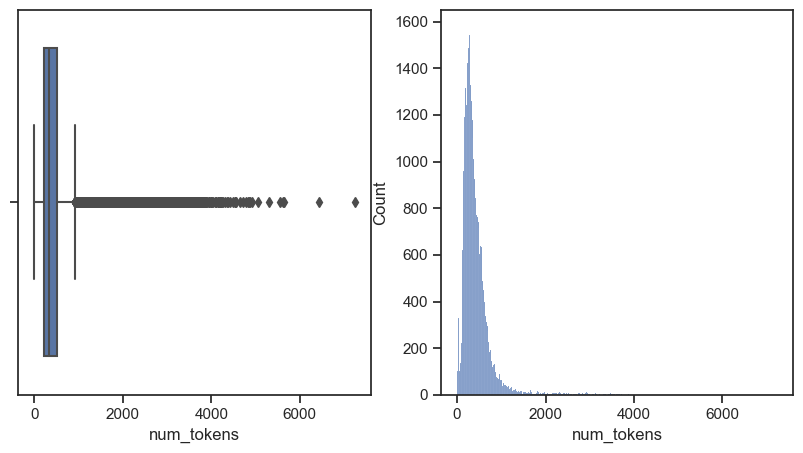

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the boxplot on the first subplot
sns.boxplot(x=api_data_complete_df['num_tokens'], ax=axs[0])

# Plot the histogram on the second subplot
sns.histplot(x=api_data_complete_df['num_tokens'], ax=axs[1])

# Show the plot
plt.show()

(0.0, 4000.0)

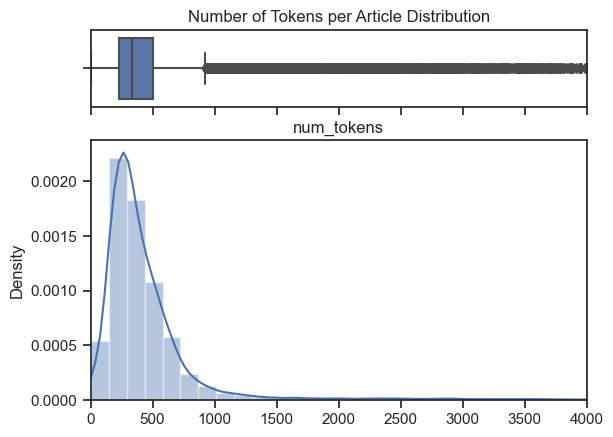

In [37]:
# Boxplot plus histogram of token distribution to see outliers
sns.set(style="ticks")

x = np.random.randn(100)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.25, .85)})
sns.boxplot(x=api_data_complete_df['num_tokens'], ax=ax_box)
sns.distplot(x=api_data_complete_df['num_tokens'], ax=ax_hist)
ax_box.set(title='Number of Tokens per Article Distribution')
ax_box.set_xlim([0, 4000])
ax_hist.set_xlim([0, 4000])

Text(0.5, 1.0, 'Number of Tokens per Article Histogram')

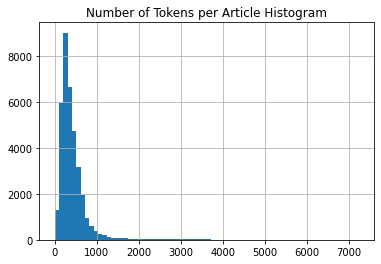

In [106]:
api_data_complete_df['num_tokens'].hist(bins=70)
plt.title('Number of Tokens per Article Histogram')

--------

#### A brief look into the long "outlier-ISH" articles:

In [39]:
#long_articles = api_data_complete_df.groupby(api_data_complete_df['num_tokens']>507)

long_articles_idx = api_data_complete_df.groupby(api_data_complete_df['num_tokens'] >507)[['url',\
    'num_tokens','processed_text']]
long_articles_df=pd.DataFrame(long_articles_idx)
long_articles_df.head()
long_articles_df2=pd.DataFrame(long_articles_df.iloc[1,1])

In [43]:
long_articles_df2.shape

(9062, 3)

In [42]:
long_articles_df2.describe()

num_tokens
count  9062.000000
mean    883.765946
std     620.859092
min     508.000000
25%     572.000000
50%     662.000000
75%     872.000000
max    7240.000000

In [44]:
XTRAlong_articles_idx = api_data_complete_df.groupby(api_data_complete_df['num_tokens'] >1000)[['url',\
    'num_tokens','processed_text']]
XTRAlong_articles_df=pd.DataFrame(XTRAlong_articles_idx)
XTRAlong_articles_df.head()
XTRAlong_articles_df2=pd.DataFrame(XTRAlong_articles_df.iloc[1,1])

In [48]:
XTRAlong_articles_df2.shape

(1677, 3)

In [55]:
XTRAlong_articles_df2.describe()

num_tokens
count  1677.000000
mean   1882.809183
std     890.437687
min    1001.000000
25%    1171.000000
50%    1536.000000
75%    2423.000000
max    7240.000000

In [49]:
XTRAlong_articles_df2.head(100)

url  num_tokens  \
6     https://rolltidewire.usatoday.com/lists/alabam...        1457   
130   https://www.usatoday.com/story/money/reviewed/...        1795   
140   https://www.usatoday.com/story/money/reviewed/...        1121   
155   https://mmajunkie.usatoday.com/gallery/photos-...        1311   
164   https://www.usatoday.com/story/news/world/2023...        1591   
...                                                 ...         ...   
2850  https://www.cnn.com/2023/06/25/politics/ron-de...        1002   
2937  https://www.wired.com/story/gadget-lab-podcast...        2795   
2938  https://www.cnn.com/americas/live-news/titanic...        1681   
2940  https://www.nbcnews.com/news/us-news/live-blog...        1317   
2946  https://www.buzzfeed.com/courtney_lynch/small-...        2143   

                                         processed_text  
6     recruiting roundup latest alabama football rec...  
130   recommendations independently chosen revieweds...  
140   recommendations independently chosen revieweds...  
155   photos pfl ceremonial weigh ins fighter faceof...  
164   head wagner mercenary group troops reversing a...  
...                                                 ...  
2850  gov ron desantis toured country calling florid...  
2937  week gadget lab joined journalist author alden...  
2938  missing titanic sub search newsby helen regan ...  
2940  pm utcby newsmillions people across country co...  
2946  hope love recommendations sent samples indepen...  

[100 rows x 3 columns]

In [51]:
XTRAlong_articles_df2.loc[2937,'url']

'https://www.wired.com/story/gadget-lab-podcast-603/'

In [52]:
XTRAlong_articles_df2.loc[2937,'processed_text']

'week gadget lab joined journalist author alden wicker new book called dye toxic fashion making us sickand fight back discuss wide range chemicals dyes treatments go clothes offer tips avoid worst offenders shopping new wardrobe show notes aldens book dye week gp putnams sons buy wherever books sold editor sustainable fashion publication ecocult also read aldens fashion industry recommendations alden recommends vermont recommends tzatziki sauce mike recommends creative act way rick rubin alden wicker found twitter aldenwicker laurengoode snackfight bling main hotline gadgetlab show produced boone ashworth theme music solar keys listen always listen weeks podcast audio player page want subscribe free get every episode heres iphone ipad open app called podcasts tap link also download app like overcast pocket casts search gadget lab use android find us google podcasts app tapping spotify case really need heres rss feed transcript mike like shirt wearing get hard time believing really like

In [53]:
XTRAlong_articles_df2.loc[130,'url']

'https://www.usatoday.com/story/money/reviewed/2023/06/30/4th-of-july-sales-save-on-mattresses-awara-tuft-needle/70372782007/'

In [54]:
XTRAlong_articles_df2.loc[130,'processed_text']

'recommendations independently chosen revieweds editors purchases make links earn us publishing partners commission th barbecue fireworks might eager good nights sleep festivities help sleep soundly summer long rounded best th mattress sales likes casper awara zoma keep scrolling th mattress deals suggest checking shop tuftneedle th salehere want help find perfect sleeper matter side nap many best summer sales come makers best mattresses ever tested whether need hybrid base something keep cool hot nights theres mattress deal best th mattress dealssleepys queen basic innerspring mattress mattress firm save cocoon sealy chill queen memory foam mattress cocoon sealy save nectar memory foam queen mattress nectar save ghostbed classic queen mattress ghostbed save awara queen natural hybrid mattress awara save th tv salesget best visuals th tv deals amazon best buy walmartnectar mattress saleget sitewideif side sleeper need something truly cradles night nectar place shop th brand currently o

In [56]:
XXTRAlong_articles_idx = api_data_complete_df.groupby(api_data_complete_df['num_tokens'] >3000)[['url',\
    'num_tokens','processed_text']]
XXTRAlong_articles_df=pd.DataFrame(XXTRAlong_articles_idx)
XXTRAlong_articles_df.head()
XXTRAlong_articles_df2=pd.DataFrame(XXTRAlong_articles_df.iloc[1,1])

In [57]:
XXTRAlong_articles_df2.shape

(214, 3)

In [58]:
XXTRAlong_articles_df2.describe()

num_tokens
count   214.000000
mean   3647.359813
std     594.942193
min    3006.000000
25%    3246.250000
50%    3503.000000
75%    3812.000000
max    7240.000000

In [62]:
XXTRAlong_articles_df2.tail(100)

url  num_tokens  \
18923  https://www.buzzfeed.com/courtney_lynch/holy-g...        3006   
18940  https://www.buzzfeed.com/amandadavis3/items-ab...        3356   
18963  https://www.buzzfeed.com/haleyzovickian/beauty...        3484   
18973  https://www.buzzfeed.com/emmalord9/tiktok-prod...        4262   
18994  https://www.wired.com/story/have-a-nice-future...        3074   
...                                                  ...         ...   
35996  https://www.buzzfeed.com/emmalord9/tiktok-prod...        3277   
36003  https://www.buzzfeed.com/taylor_steele/product...        3404   
36019  https://www.buzzfeed.com/jonathanmazzei/popula...        3006   
36173  https://www.buzzfeed.com/emmalord9/tiktok-beau...        3141   
36374  https://www.buzzfeed.com/chelseastuart/product...        3165   

                                          processed_text  
18923  hope love recommendations sent samples indepen...  
18940  hope love recommendations sent samples indepen...  
18963  hope love recommendations sent samples indepen...  
18973  hope love recommendations sent samples indepen...  
18994  show notes check coverage things cities transp...  
...                                                  ...  
35996  hope love recommendations sent samples indepen...  
36003  hope love recommendations sent samples indepen...  
36019  hope love recommendations sent samples indepen...  
36173  hope love recommendations sent samples indepen...  
36374  hope love recommendations sent samples indepen...  

[100 rows x 3 columns]

In [60]:
XXTRAlong_articles_df2.loc[789,'url']

'https://www.buzzfeed.com/samanthawieder/products-that-have-so-many-reviews-they-would-be-influencers'

In [61]:
XXTRAlong_articles_df2.loc[789,'processed_text']

'hope love recommendations sent samples independently selected editors fyi collects share sales andor compensation links page shopping·posted jun products many reviews would considered influencers peopletheres mascara list costs less k reviews like lot reviews wiederbuzzfeed stafffacebookpinteresttwittermaillink mascara give lashes dramatic one believe tell bought less amazon need spend hours wrestling falsies get long lashes dreams reviewers also rave lasts day thank goodness better things apply throughout day kayla boyd buzzfeedpromising review teacher since pandemic hit longer wear makeup school makeup irritates skin mask wearing anything plus makes morning time hella easy bareface put mascara literally makeup face lashes done magic kid lashes literally heard day upon walking building teacher friend way end hall like oh got makeup today kid came commented lashes best teammate mine sub trouble announcements went help homeroom went bananas lashes started clapping got standing ovation 

In [63]:
reviews_articles_idx = XXTRAlong_articles_df2.groupby(XXTRAlong_articles_df2['processed_text'].str.contains('recommendation'))[['url',\
    'num_tokens','processed_text']]
reviews_articles_df=pd.DataFrame(reviews_articles_idx)
reviews_articles_df.head()
reviews_articles_df2=pd.DataFrame(reviews_articles_df.iloc[1,1])

In [68]:
NONreviews_articles_df2=pd.DataFrame(reviews_articles_df.iloc[0,1])

In [69]:
NONreviews_articles_df2.head()

url  num_tokens  \
1079  https://www.usatoday.com/story/sports/nba/2023...        3868   
1335  https://www.foxnews.com/live-news/missing-ocea...        7240   
1465  https://www.reuters.com/investigates/special-r...        4197   
3529  https://www.usatoday.com/in-depth/news/investi...        4215   
4122  https://www.forbes.com/sites/lanceeliot/2023/0...        3069   

                                         processed_text  
1079  highly anticipated nba draft complete san anto...  
1335  postssort bysort newestsort oldestback topinco...  
1465  americas family secret us leaders lawmakers pr...  
3529  friends believed could mlk bullet took life we...  
4122  turns ai might means first contact intelligent...

In [70]:
NONreviews_articles_df2.loc[1335,'url']

'https://www.foxnews.com/live-news/missing-oceangate-titanic-tourist-submarine-search-is-underway'

In [71]:
NONreviews_articles_df2.loc[1335,'processed_text']

'postssort bysort newestsort oldestback topincoming update coverage event ended canadian armed forces jrcc offer condolences following tragic loss titan crew joint rescue coordination centre canadian armed forces released twitter offering sincere condolences family friends crew titan tragic loss weeklong search oceangates titan found imploded killing five passengers truly unfortunate outcome concluding great efforts cooperation countries militaries partners joint read operation transitioning recovery salvage mrcc boston longer requires rescue services jrcc canadian military contributed massive international search oceangate vessel jrcc rescue assets return base regenerate search rescue capability prepare future search rescue events continued effort potential recover salvage wreckage titan currently discussed posted lawrence richard shareoceangate ceo seen video admitting breaking rules build doomed submersibleoceangate ceo stockton rush one five passengers killed fatal mission titanic 

In [65]:
XXTRAlong_articles_df2.shape

(214, 3)

In [64]:
reviews_articles_df2.shape

(178, 3)

In [67]:
reviews_articles_df2.tail(100)

url  num_tokens  \
16363  https://www.buzzfeed.com/haleyzovickian/tiktok...        3458   
16381  https://www.buzzfeed.com/jessicahall2/upgrade-...        3679   
16918  https://www.buzzfeed.com/elizabethlilly/things...        4149   
16921  https://www.buzzfeed.com/emmalord9/items-deser...        3887   
17257  https://www.buzzfeed.com/haleyzovickian/if-you...        3731   
...                                                  ...         ...   
35996  https://www.buzzfeed.com/emmalord9/tiktok-prod...        3277   
36003  https://www.buzzfeed.com/taylor_steele/product...        3404   
36019  https://www.buzzfeed.com/jonathanmazzei/popula...        3006   
36173  https://www.buzzfeed.com/emmalord9/tiktok-beau...        3141   
36374  https://www.buzzfeed.com/chelseastuart/product...        3165   

                                          processed_text  
16363  hope love recommendations sent samples indepen...  
16381  hope love recommendations sent samples indepen...  
16918  hope love recommendations sent samples indepen...  
16921  hope love recommendations sent samples indepen...  
17257  hope love recommendations sent samples indepen...  
...                                                  ...  
35996  hope love recommendations sent samples indepen...  
36003  hope love recommendations sent samples indepen...  
36019  hope love recommendations sent samples indepen...  
36173  hope love recommendations sent samples indepen...  
36374  hope love recommendations sent samples indepen...  

[100 rows x 3 columns]

----

**Articles that had more than 1000 tokens tended to have a large number of reviews/recommendation of products or interviews. Above 3,000 tokens were almost entirely reviews. Therefore, the extra long articles in the corpus seem to be valid articles without the artifacts of ads or comments**

**Of the articles with more than 3,000 words, which totalled 224, 178 were product recommendations, while others (from what can be gathered) appear to be stories or many mini parts of the same story with 'Click to Read More' links after each one.**

**These longer articles are therefore not outliers of non-article content but a good amount of the super long articles are product recommendations, which may or may not be relevant in this study.**

---

In [20]:
api_data_complete_df['num_tokens'].median()

336.0

In [22]:
authors=api_data_complete_df['author'].value_counts()
authors.shape

(7288,)

In [23]:
authors

author
The Associated Press               1847
Data Skrive                         940
Associated Press                    504
Reuters                             246
Celtics Wire                        243
                                   ... 
David McKenzie,Bethlehem Fekele       1
Lalee Ibssa, Soo Rin Kim              1
Aileen Graef                          1
Rachel Weiner                         1
Jamie Gangel And Shawna Mizelle       1
Name: count, Length: 7288, dtype: int64

In [24]:
api_data_complete_df['author'].mode()

0    The Associated Press
Name: author, dtype: object

---

**The number of total articles collected are *36,405* and since we found 3 records have missing processed text, we have a total number of records used for this analysis of *36,402*.** 

**Average Token count is *433.7793* words per article, with a median of *336* due to the extremely high counts in the data. The Histogram for the number of Tokens in each article is right skewed, as the difference between mean and medium indicates.**

**The standard deviation (variability) is about as much *415.6439* given that there are a couple records with *0* words per article (were not parsed) and that there are some articles with significantly large token counts up to a maximum of *7240* words.**

**The 75% percentile of 507 indicates most of the data lies in the lower range and just a few articles out of the 36,405 have word counts over 507.**

**The total number of unique authors present in the data are *7,288*, with The Associated Press being the largest presence as 'author' with *1,847* articles attributed to them. This is without counting those with the authorship of "Associated Press" (absent "The"), which account for *504* articles attributed to that authorship.**

**These results show we have gathered an adequate amount of data for our analysis.**

---

### Word Clouds

In [21]:
api_data_complete_df['tokens']=api_data_complete_df['processed_text'].apply(prepare,
                                                     pipeline=tokenize_sw_pipeline)

In [22]:
Text_Words=[token for sublist in
           api_data_complete_df['tokens'] 
           for token in sublist]
Text_Words_counts = collections.Counter(Text_Words)


In [36]:
#Text_Words

In [23]:
print("\nNews articles' top 20 words:\n")
for HT, count in Text_Words_counts.most_common(20):
    print(f"{HT}: {count}")


News articles' top 20 words:

one: 68474
also: 59528
year: 53235
time: 49535
like: 47621
new: 46891
two: 43469
would: 41760
first: 39995
people: 39412
get: 37471
last: 33679
best: 32351
years: 32146
could: 31516
amazon: 30756
make: 29272
even: 27675
three: 26164
state: 25426


In [24]:
Text_Words_counts2 = count_words(Text_Words, split=0)
#display(Text_Words_counts2)

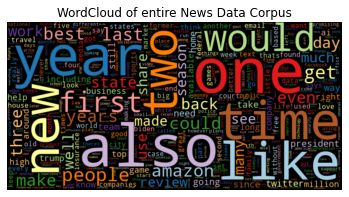

In [67]:
wordcloud(Text_Words_counts2['freq'], title="WordCloud of entire News Data Corpus", max_words=500)

---

**With the preprocessing already done, the wordcloud doesn't tell us much. This is because it includes coverage of a variety of topics and news sources for the month of June. A deeper look into topics and sentiment might offer better opportunities to observe things like wordclouds and hence derive meaningful insights**

---

### Topic Modeling Non-Negative Matrix (NMF):

In [16]:
pipeline_basic = [remove_punctuation,remove_messy]
api_data_complete_df['clean_processed_text']=api_data_complete_df['processed_text'].apply(prepare,
                                                                                          pipeline = pipeline_basic)

In [17]:
tfidf_topic = TfidfVectorizer(stop_words=list(sw), min_df=5, max_df=0.7, ngram_range=(1,2))
topic_modeling_input = tfidf_topic.fit_transform(api_data_complete_df['clean_processed_text'])

In [22]:
nmf_text_model_news = NMF(n_components=10, random_state=314)
text_matrix = nmf_text_model_news.fit_transform(topic_modeling_input)
H_text_matrix = nmf_text_model_news.components_

---

Calculate coherence score and percentage drops for features to determine if the number of topics is adequate, change the number iteratively until a good coherence and percentage values are achieved:

Display Topics:

In [23]:
display_topics(nmf_text_model_news, tfidf_topic.get_feature_names_out())


Topic 00
  season (0.26)
  draft (0.26)
  nba (0.24)
  text (0.23)
  email (0.22)

Topic 01
  prop (1.01)
  runs (0.81)
  odds (0.75)
  rbi (0.66)
  games (0.64)

Topic 02
  amazon (0.69)
  review (0.44)
  promising review (0.33)
  amazon available (0.30)
  promising (0.29)

Topic 03
  trump (1.21)
  president (0.43)
  biden (0.41)
  trumps (0.35)
  indictment (0.32)

Topic 04
  business (0.13)
  work (0.12)
  travel (0.12)
  insurance (0.12)
  companies (0.11)

Topic 05
  russian (0.92)
  prigozhin (0.69)
  ukraine (0.66)
  wagner (0.59)
  putin (0.53)

Topic 06
  ai (2.37)
  generative (0.43)
  generative ai (0.41)
  data (0.39)
  technology (0.32)

Topic 07
  titanic (0.90)
  submersible (0.80)
  titan (0.67)
  oceangate (0.67)
  sub (0.42)

Topic 08
  inflation (0.45)
  rates (0.39)
  rate (0.37)
  loan (0.32)
  interest (0.27)

Topic 09
  police (0.22)
  court (0.21)
  state (0.15)
  law (0.13)
  abortion (0.12)


---

**Topic Modeling using NMF reveals that the top 10 topics present in news article data are:**

* Sports/NBA
* Sports/Baseball
* Amazon/Review
* Presidency/Government
* Business/Work/Travel
* Foreign Affairs/Ukraine/Russia
* Technology/AI regulation
* Titan Implosion
* Economy/Inflation
* Police/Court

**Topics are well defined and clearly distinctive using NMF topic modeling.**

---

### Topic Modeling Latent Dirichlet Allocation (LDA):

In [28]:
count_text_vectorizer = CountVectorizer(stop_words=list(sw), min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(api_data_complete_df['clean_processed_text'])
count_text_vectors.shape

(36402, 58466)

In [25]:
lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_text_vectors)
H_lda_para_matrix = lda_para_model.components_

In [26]:
display_topics(lda_para_model, count_text_vectorizer.get_feature_names_out())



Topic 00
  ai (0.84)
  companies (0.60)
  business (0.57)
  data (0.50)
  company (0.49)

Topic 01
  trump (0.80)
  president (0.73)
  biden (0.64)
  court (0.61)
  state (0.50)

Topic 02
  year (0.96)
  rate (0.49)
  rates (0.48)
  loan (0.45)
  market (0.43)

Topic 03
  like (0.72)
  one (0.63)
  people (0.58)
  time (0.42)
  also (0.41)

Topic 04
  china (0.64)
  students (0.56)
  school (0.55)
  apple (0.50)
  save (0.46)

Topic 05
  amazon (1.48)
  review (0.92)
  get (0.72)
  available (0.70)
  one (0.66)

Topic 06
  season (0.99)
  team (0.69)
  draft (0.59)
  year (0.59)
  game (0.57)

Topic 07
  games (0.86)
  game (0.84)
  season (0.83)
  share (0.77)
  twitter (0.73)

Topic 08
  police (0.68)
  year (0.51)
  two (0.43)
  people (0.40)
  old (0.38)

Topic 09
  million (0.82)
  company (0.61)
  year (0.57)
  new (0.49)
  also (0.46)


In [27]:
lda_display = pyLDAvis.lda_model.prepare(lda_para_model, count_text_vectors, 
                                              count_text_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

In [381]:
pyLDAvis.save_html(lda_display, 'lda_capstone1.html')

---

**Topic Modeling using LDA reveals that the top 10 topics present in news article data are:**

* AI/business
* Trump/Presidency
* Rates/Market
* One/People
* Chine/School
* Amazon/Review
* Sports/Draft
* Sports/Season
* Police/Year
* Million/Company

**As we can see, the topics overlap and are not very clearly distinctive when using LDA topic modeling.**

----

### Topic Coherence Scores

#### NMF Coherence:

In [18]:
gensim=[[w for w in re.findall(r'\b\w\w+\b', text.lower()) if w not in sw] for text in api_data_complete_df['clean_processed_text']]

In [19]:
dict_gensim = Dictionary(gensim)

In [20]:

bow_gensim=[dict_gensim.doc2bow(word) for word in gensim]
tfIdf_gensim=TfidfModel(bow_gensim)
vectors_gensim=tfIdf_gensim[bow_gensim]
#nmf_gensim=Nmf(topic_modeling_input, num_topics=10, id2word=dict_gensim, kappa=0.1, eval_every=5)

In [21]:
nmf_gensim=Nmf(vectors_gensim, num_topics=10, id2word=dict_gensim, kappa=0.1, eval_every=5, random_state=314)

In [22]:
nmf_para_coherence = CoherenceModel(model=nmf_gensim,texts=gensim, dictionary=dict_gensim, coherence='c_v')
nmf_para_coherence_score=nmf_para_coherence.get_coherence()
print(nmf_para_coherence_score)

0.7334911424765458


#### A function to quickly detect the ideal number of topics simply based on coherence scores:

In [23]:
def find_ideal_topic_number(nmf_model, nmf_coherence, n_topics):
    if (nmf_coherence < 0.69):
        n_topics += n_topics+2
        nmf_model=Nmf(vectors_gensim, num_topics=n_topics, id2word=dict_gensim, kappa=0.1, eval_every=5, random_state=314)
        nmf_coherence=nmf_para_coherence.get_coherence()
        if nmf_coherence < 0.69:
            n_topics += n_topics+2
            nmf_model=Nmf(vectors_gensim, num_topics=n_topics, id2word=dict_gensim, kappa=0.1, eval_every=5, random_state=314)
            nmf_coherence=nmf_para_coherence.get_coherence()
            if nmf_para_coherence_score < 0.69:
                n_topics += n_topics+2
                nmf_model=Nmf(vectors_gensim, num_topics=n_topics, id2word=dict_gensim, kappa=0.1, eval_every=5, random_state=314)
                nmf_coherence=nmf_para_coherence.get_coherence()
            else:
                return(nmf_model, nmf_coherence, n_topics)
        else:
            return(nmf_model, nmf_coherence, n_topics)
    else:
        return(nmf_model, nmf_coherence, n_topics)
    
    

In [24]:
nmf_gensim, nmf_para_coherence_score, n_topics = find_ideal_topic_number(nmf_gensim, 
                                                                         nmf_para_coherence_score, 10)

#### Add topic assignments as features to dataset:

In [26]:
# run the NMF for topic definitions with the current ideal
# value for n_topics derived earlier:

nmf_text_model_news = NMF(n_components=n_topics, random_state=314)
text_matrix = nmf_text_model_news.fit_transform(topic_modeling_input)
H_text_matrix = nmf_text_model_news.components_

In [27]:
topic_names = []
voc=tfidf_topic.get_feature_names_out()
for topic in nmf_text_model_news.components_:
    important = topic.argsort()
    top_word=voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append(top_word)

In [28]:
#topic_ = defaultdict(list)
for idx, row in enumerate(text_matrix) : 
    topic3 = np.where(row == np.amax(row))[0]
    in_order =row.argsort()
    topic2nd = in_order[1]
    topic3rd =  in_order[2]
    important_=topic3.argsort()
    #print(topic3, topic2nd, topic3rd)
    api_data_complete_df.at[idx,"topic"]=topic3[0]
    api_data_complete_df.at[idx,"topic_name"]=topic_names[topic3[0]]
    api_data_complete_df.at[idx,"topic_name_2nd"]=topic_names[topic2nd]
    api_data_complete_df.at[idx,"topic_name_3rd"]=topic_names[topic3rd]

    
    #topic_[topic3[0]].

Add thresholds to the inclusion of topics 2 and 3...

In [ ]:
print(topic_names)

'''Obtain row-wise proportions for W matrix and convert top 3 topics over a
threshold for each document to a (n, t) binary array, where n is the
number of records and t is the number of topics citation:
https://chat.openai.com/share/c8cbd38a-b024-4915-939d-cf5f9209926b
'''
np.set_printoptions(suppress=True,
                    precision=4)

# Calculate the row totals
row_totals = np.sum(text_matrix, axis=1)

# Divide each element in the array by its corresponding row total
row_proportions = text_matrix / row_totals[:, np.newaxis]
print(len(row_proportions))
# row_proportions now contains the desired results
display(row_proportions[:10])

# Define the threshold for selection (0.33 in this case)
threshold = 0.33
n_top = 5

# Create an empty array to store the results
topic = np.zeros((len(row_proportions), 10), dtype=int)

for idx, row in enumerate(row_proportions):
    # Get indices of elements that satisfy the condition: above the threshold
    above_threshold_indices = np.where(row > threshold)[0]
    
    # Sort the indices based on their corresponding values in descending order
    sorted_indices = above_threshold_indices[np.argsort(row[above_threshold_indices])[::-1]]
    
    # Choose the top X indices if available, or fewer if there are fewer elements above the threshold
    top_3_indices = sorted_indices[:min(n_top, len(sorted_indices))]
    
    # Set the corresponding elements in the 'topic' array to 1
    topic[idx, top_3_indices] = 1

# Now 'topic' contains the desired binary representation of the top 3 values above the threshold in each row.
print(topic[:23])
print(topic[-23:])
api_data_complete_df['multilabel'] = topic.tolist()

out_cols = ['text_id', 'source_name', 'processed_text']
api_data_complete_df[out_cols].to_csv("../data_large/capstone_master_tm_X01_v1.csv", sep=',')

np.save("../data/capstone_master_tm_y01_v1.npy", topic)

print(api_data_complete_df.shape)
display(api_data_complete_df.sample(5))

In [29]:
predefined_topics = ['business', 'politics', 'sports','shopping', 'technology',
                     'current_events']


#### Mapping of Topics assinged and predefined topics:

In [45]:
def mapping_topics(article_df):
    customer_topics=[]
    mapped_topic = 'misc'
    for items in article_df['topic_name']:
        if (items == 'season draft') | (items == 'prop runs'):
            mapped_topic = 'sports'
        elif (items == 'trump president') | (items == 'russian prigozhin')  | (items == 'police court'):
            mapped_topic = 'politics/government'
        elif items == 'amazon review':
            mapped_topic = 'shopping'
        elif (items == 'inflation rates') | (items == 'business work'):
            mapped_topic = 'business'
        elif items == 'ai generative':
            mapped_topic = 'technology'
        elif items == 'titanic submersible':
            mapped_topic = 'current_events'
        customer_topics.append(mapped_topic)
    article_df['customer_topics'] = customer_topics
    return article_df

In [46]:
api_data_complete_modeling_df=mapping_topics(api_data_complete_df)

In [64]:
api_data_complete_modeling_df.head()

index  text_id source_name                                author  \
0      0        2   USA Today  USA TODAY, Emily DeLetter, USA TODAY   
1      1        3   USA Today     USA TODAY, Joy Ashford, USA TODAY   
2      2        5   USA Today                        Tar Heels Wire   
3      3        6   USA Today                        Roll Tide Wire   
4      4        7   USA Today                          Celtics Wire   

                                               title  \
0  Tito's launches 'Tito's in a Big Can,' an empt...   
1  Search for missing actor Julian Sands continue...   
2  Four star running back picks Michigan State ov...   
3  Alabama center Charles Bediako signs one-year ...   
4  Ralph Sampson breaks down iconic Boston Celtic...   

                                                 url publish_date  \
0  https://www.usatoday.com/story/money/food/2023...   2023-06-21   
1  https://www.usatoday.com/story/entertainment/c...   2023-06-20   
2  https://tarheelswire.usatoday.com/2023/06/24/f...   2023-06-25   
3  https://rolltidewire.usatoday.com/2023/06/23/a...   2023-06-23   
4  https://celticswire.usatoday.com/2023/06/23/nb...   2023-06-23   

                                        article_text  \
0  Have you ever wanted to own your very own keg ...   
1  Over five months after Julian Sands went missi...   
2  \n\n\n\n\n\n\n\n\n\n\n\n\n\nFour star running ...   
3  \n\n\n\n\n\n\n\n\n\n\n\n\n\nAlabama center Cha...   
4  \n\n\n\n\n\n\n\n\n\n\n\n\n\nRalph Sampson brea...   

                                             content  \
0  Have you ever wanted to own your very own keg ...   
1  Over five months after Julian Sandswent missin...   
2  Mack Brown and the UNC football program have b...   
3  Alabama center Charles Bediako was signed to a...   
4  It was one of the most memorable moments in NB...   

                                      processed_text  \
0  ever wanted keg titos handmade vodka dream bec...   
1  five months julian sands went missing solo hik...   
2  four star running back picks michigan state un...   
3  alabama center charles bediako signs one year ...   
4  ralph sampson breaks iconic boston houston roc...   

                                processed_text_split  num_tokens  \
0  ['ever', 'wanted', 'keg', 'titos', 'handmade',...         117   
1  ['five', 'months', 'julian', 'sands', 'went', ...         215   
2  ['four', 'star', 'running', 'back', 'picks', '...         161   
3  ['alabama', 'center', 'charles', 'bediako', 's...         237   
4  ['ralph', 'sampson', 'breaks', 'iconic', 'bost...         134   

   original_word_count                               clean_processed_text  \
0                  202  ever wanted keg titos handmade vodka dream bec...   
1                  340  five months julian sands went missing solo hik...   
2                  286  four star running back picks michigan state un...   
3                  381  alabama center charles bediako signs one year ...   
4                  228  ralph sampson breaks iconic boston houston roc...   

   topic     topic_name   topic_name_2nd     topic_name_3rd customer_topics  
0    2.0  amazon review  trump president  russian prigozhin        shopping  
1    9.0   police court  trump president    inflation rates        shopping  
2    0.0   season draft    amazon review    trump president        shopping  
3    0.0   season draft    amazon review    trump president        shopping  
4    0.0   season draft    amazon review    trump president        shopping

In [54]:
# alternate method to match the predefined topic words to the feature wordsets for topics:

display_topics(nmf_text_model_news, tfidf_topic.get_feature_names_out())


Topic 00
  season (0.26)
  draft (0.26)
  nba (0.24)
  text (0.23)
  email (0.22)

Topic 01
  prop (1.01)
  runs (0.81)
  odds (0.75)
  rbi (0.66)
  games (0.64)

Topic 02
  amazon (0.69)
  review (0.44)
  promising review (0.33)
  amazon available (0.30)
  promising (0.29)

Topic 03
  trump (1.21)
  president (0.43)
  biden (0.41)
  trumps (0.35)
  indictment (0.32)

Topic 04
  business (0.13)
  work (0.12)
  travel (0.12)
  insurance (0.12)
  new (0.11)

Topic 05
  russian (0.92)
  prigozhin (0.69)
  ukraine (0.66)
  wagner (0.59)
  putin (0.53)

Topic 06
  ai (2.37)
  generative (0.43)
  generative ai (0.41)
  data (0.39)
  technology (0.32)

Topic 07
  titanic (0.90)
  submersible (0.80)
  titan (0.67)
  oceangate (0.67)
  sub (0.42)

Topic 08
  inflation (0.45)
  rates (0.39)
  rate (0.37)
  loan (0.32)
  interest (0.27)

Topic 09
  police (0.22)
  court (0.21)
  state (0.15)
  law (0.13)
  abortion (0.12)


#### Generate classifier based on predefined topics

split data train/test:

In [47]:

Xtopic_train, Xtopic_test, Ytopic_train, Ytopic_test = train_test_split(api_data_complete_modeling_df['clean_processed_text'],
                                                    api_data_complete_modeling_df['customer_topics'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=api_data_complete_modeling_df['customer_topics'])

print('Size of Training Data ', Xtopic_train.shape[0])
print('Size of Test Data ', Xtopic_test.shape[0])

Size of Training Data  29121
Size of Test Data  7281


In [48]:
tfidf_topicmodel = TfidfVectorizer(min_df = 10, max_df=0.7, ngram_range=(1,2), stop_words=sw)
Xtopic_train_tf = tfidf_topicmodel.fit_transform(Xtopic_train)
Xtopic_test_tf = tfidf_topicmodel.transform(Xtopic_test)

In [49]:
Ytopic_train.value_counts()

customer_topics
politics/government    10738
business                9982
sports                  5986
shopping                1097
technology               763
current_events           555
Name: count, dtype: int64

In [50]:

model_topic_class = LinearSVC(random_state=0, tol=1e-7)
model_topic_class.fit(Xtopic_train_tf, Ytopic_train)

LinearSVC(random_state=0, tol=1e-07)

In [51]:
Ytopic_train_pred = model_topic_class.predict(Xtopic_train_tf)

print ('Training Accuracy Score - ', accuracy_score(Ytopic_train, Ytopic_train_pred))

Training Accuracy Score -  0.9994162288382954


In [52]:
Ytopic_pred = model_topic_class.predict(Xtopic_test_tf)
print ('Accuracy Score - ', accuracy_score(Ytopic_test, Ytopic_pred))
#print ('F1 Score - ', recall_score(Y_test, Y_pred))

Accuracy Score -  0.9587968685620107


In [53]:
print('\n clasification report:\n', classification_report(Ytopic_test,Ytopic_pred))



 clasification report:
                      precision    recall  f1-score   support

           business       0.94      0.95      0.95      2495
     current_events       0.99      0.87      0.93       139
politics/government       0.96      0.97      0.96      2685
           shopping       0.99      0.87      0.92       274
             sports       0.97      0.98      0.97      1497
         technology       1.00      0.91      0.95       191

           accuracy                           0.96      7281
          macro avg       0.98      0.93      0.95      7281
       weighted avg       0.96      0.96      0.96      7281



In [54]:
print ('Accuracy Score - ', accuracy_score(Ytopic_test, Ytopic_pred))
print ('F1 Score Score - ', f1_score(Ytopic_test, Ytopic_pred, average='weighted'))
print ('Recall Score - ', recall_score(Ytopic_test, Ytopic_pred, average='weighted'))



Accuracy Score -  0.9587968685620107
F1 Score Score -  0.9586676677829662
Recall Score -  0.9587968685620107


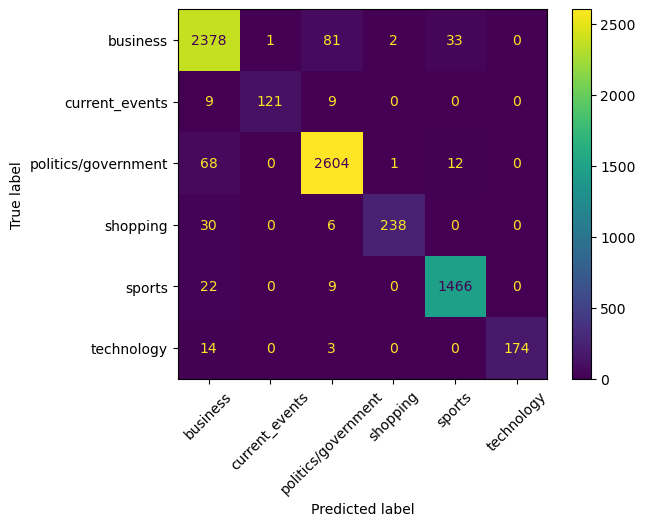

In [55]:
#Y_pred = model_topic_class.predict(X_test_tf)
confusion_matrix(Ytopic_test, Ytopic_pred)
cm = confusion_matrix(Ytopic_test, Ytopic_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_topic_class.classes_)
disp.plot()
plt.xticks(rotation=45)
plt.show()

#### LDA coherence

In [33]:
lda_gensim=LdaModel(corpus=bow_gensim,id2word=dict_gensim,alpha='auto',eta='auto',num_topics=10,eval_every=None, random_state=315)


In [34]:
lda_coherence = CoherenceModel(model=lda_gensim, texts=gensim, dictionary=dict_gensim, coherence='c_v')
lda_coherence_score = lda_coherence.get_coherence()
print(lda_coherence_score)

0.5274483490012105


---

**NMF topic modeling has a coherence score of *0.7506* while LDA topic modeling has a coherence score of *0.5274*.**

**This is no surprised given the clarity of the topics found using NMF versus LDA where there were mixed topics overlapping one another as can be seen in the LDA charts. Since NMF has a much higher coherence score than LDA, we will use NMF topics for our future time-based charts for topic modeling.**

---

#### LDA Coherence Plots:

In [35]:
lda_model_n=[]
for n in tqdm(range(5,20)):
    lda_model_test=LdaModel(corpus=bow_gensim,id2word=dict_gensim,alpha='auto',eta='auto',num_topics=n,eval_every=None, random_state=315)
    lda_coherence_test = CoherenceModel(model=lda_model_test, texts=gensim, dictionary=dict_gensim, coherence='c_v')
    lda_model_n.append((n, lda_model_test, lda_coherence_test.get_coherence()))

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [2:55:36<00:00, 702.43s/it]   


Text(0.5, 1.0, 'Coherence Scores based on Number of Topics using LDA topic modeling')

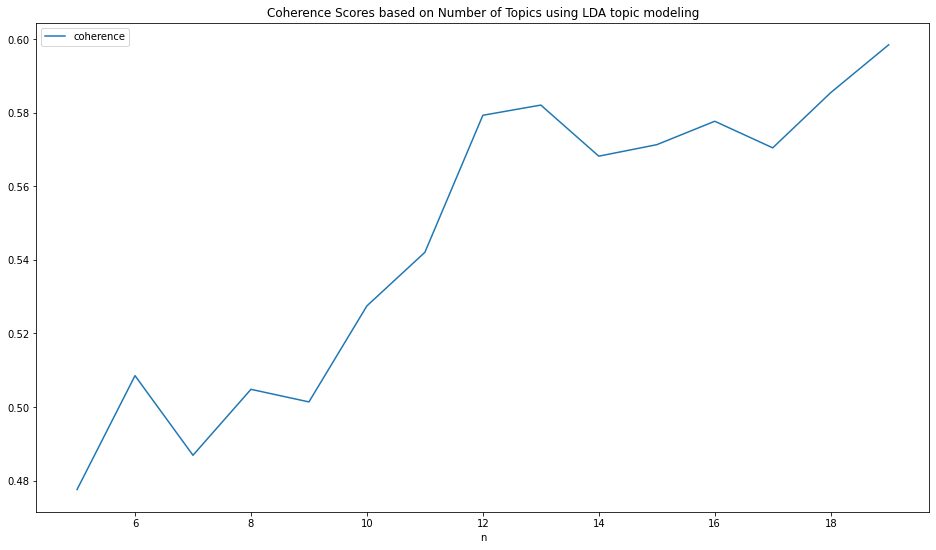

In [36]:
pd.DataFrame(lda_model_n, columns=['n','model','coherence']).set_index('n')[['coherence']].plot(figsize=(16,9))
plt.title('Coherence Scores based on Number of Topics using LDA topic modeling')

Try optimum topic number (13) found with LDA on NMF topic model:

In [39]:
nmf_gensim_test=Nmf(vectors_gensim, num_topics=13, id2word=dict_gensim, kappa=0.1, eval_every=5)

In [40]:
nmf_para_coherence_test = CoherenceModel(model=nmf_gensim_test,texts=gensim, dictionary=dict_gensim, coherence='c_v')
nmf_para_coherence_score_test=nmf_para_coherence_test.get_coherence()
print(nmf_para_coherence_score)

0.6999305276191421


#### NMF Coherence plot:

In [41]:
nmf_model_n=[]
for n in tqdm(range(5,20)):
    nmf_model_test=Nmf(vectors_gensim, num_topics=n, id2word=dict_gensim, kappa=0.1, eval_every=5)
    nmf_coherence_test = CoherenceModel(model=nmf_model_test, texts=gensim, dictionary=dict_gensim, coherence='c_v')
    nmf_model_n.append((n, nmf_model_test, nmf_coherence_test.get_coherence()))

100%|██████████| 15/15 [49:28<00:00, 197.93s/it]


Text(0.5, 1.0, 'Coherence Scores based on Number of Topics using NMF topic modeling')

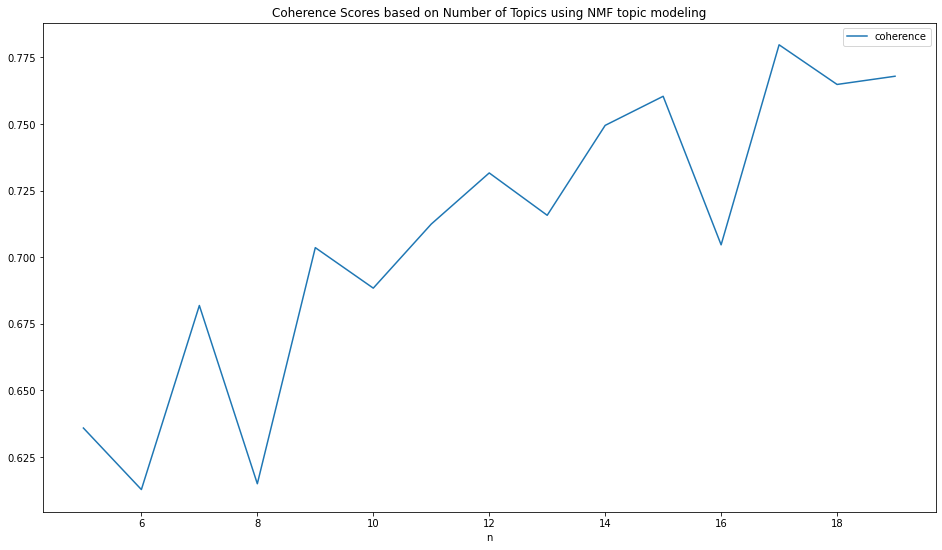

In [42]:
pd.DataFrame(nmf_model_n, columns=['n','model','coherence']).set_index('n')[['coherence']].plot(figsize=(16,9))
plt.title('Coherence Scores based on Number of Topics using NMF topic modeling')

---

**Even though coherence scores increased for LDA topic modeling with an increase in topics, the textbook Blueprints for Text Analytics Using Python by Jens Albrecht et al., warns against using the maximum value that gives the obvious highest coherence score because it is expected that coherence scores can increase with an increase in topics - however this does not mean that the topics will be better or more clearly defined.**

**Therefore, by trying the same thing with the NMF topic modeling, we find that the ideal score (not too high or too low) is about 0.75 - exactly what we are getting with 10 topics in our analysis, and these topics are fairly well defined so although we might increase coherence slightly with more topics, this might make the problem of clearly defining topics more of a challenge.**

**Therefore, we will stay with the NMF topic modeling for it's higher coherence score, clearly defined topics, with n=10 topics at this time**

----

### Topical WordClouds

#### NMF Word Clouds for 10 topics:

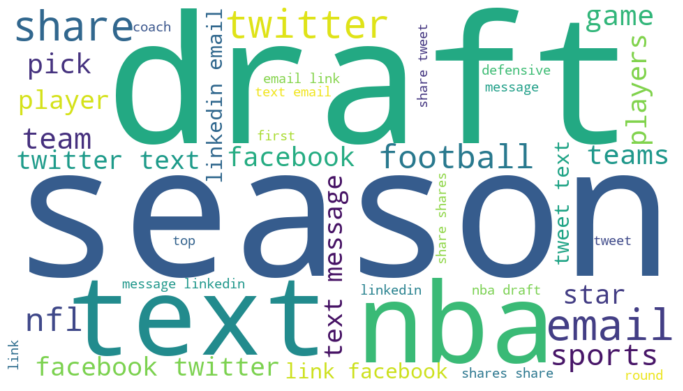

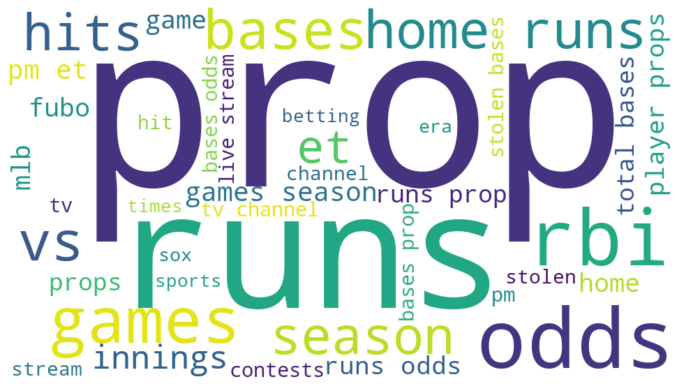

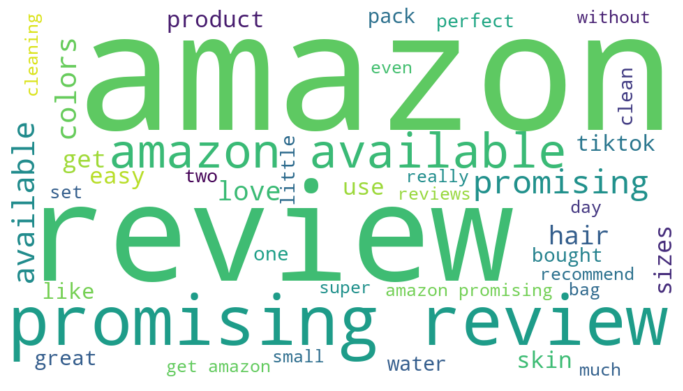

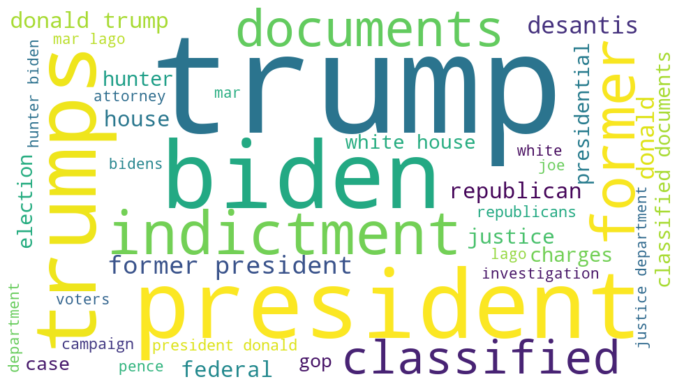

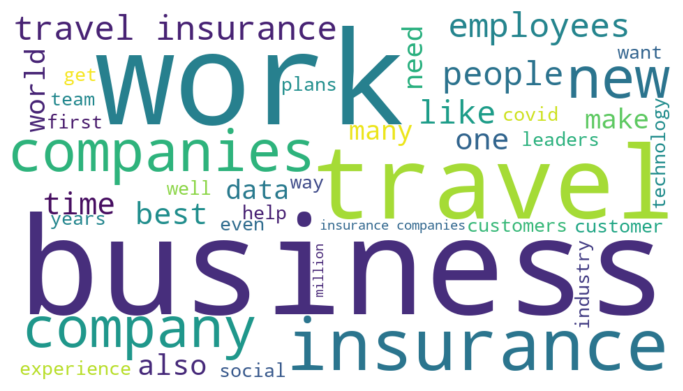

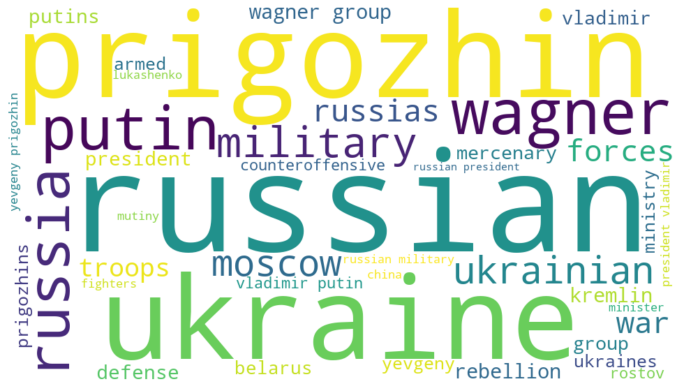

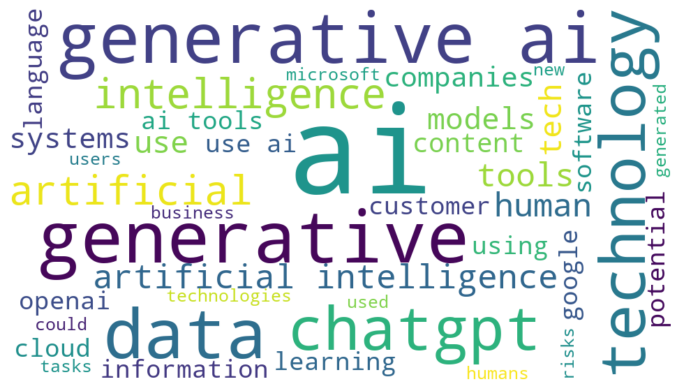

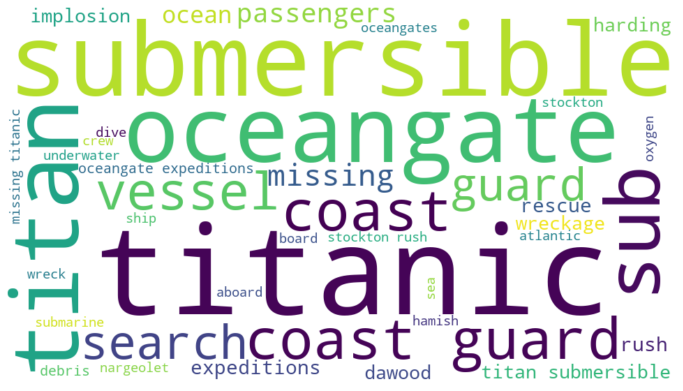

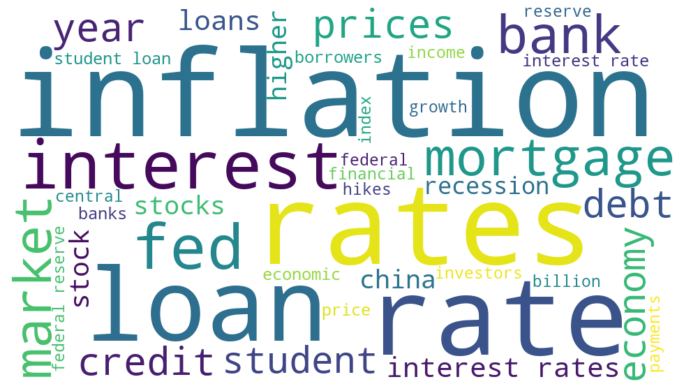

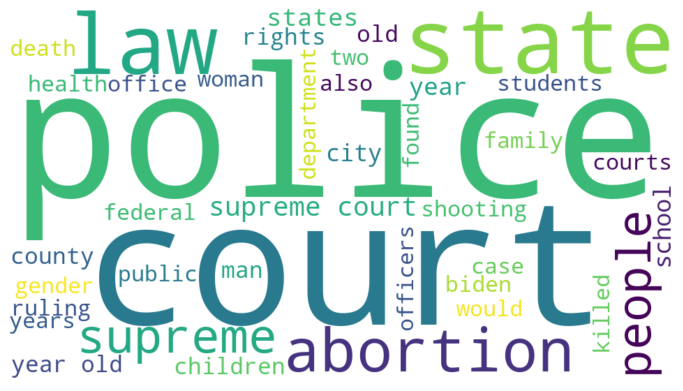

In [43]:
wordcloud_topics(nmf_text_model_news, tfidf_topic.get_feature_names_out())


#### LDA Word Clouds for 10 topics:

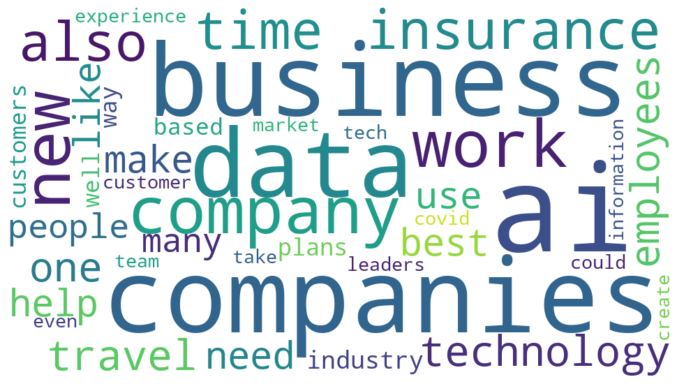

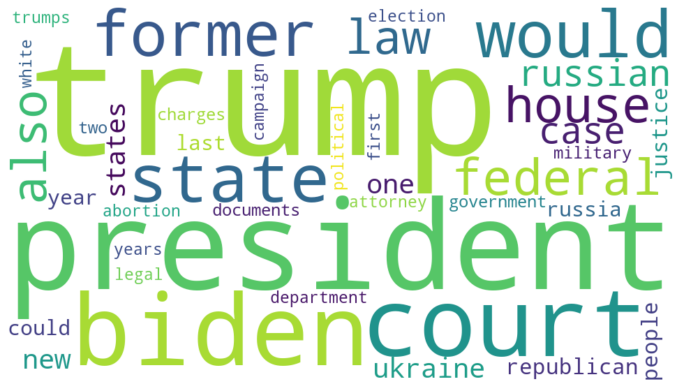

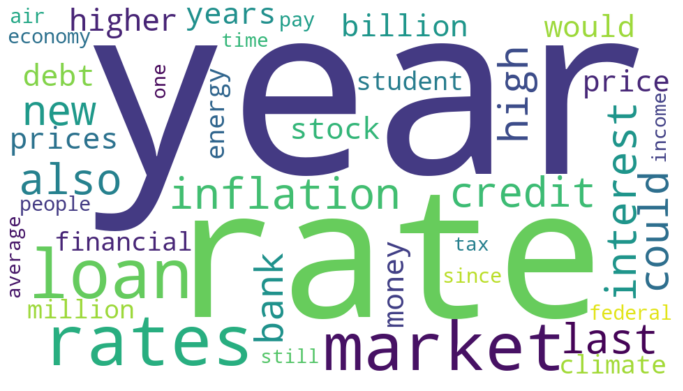

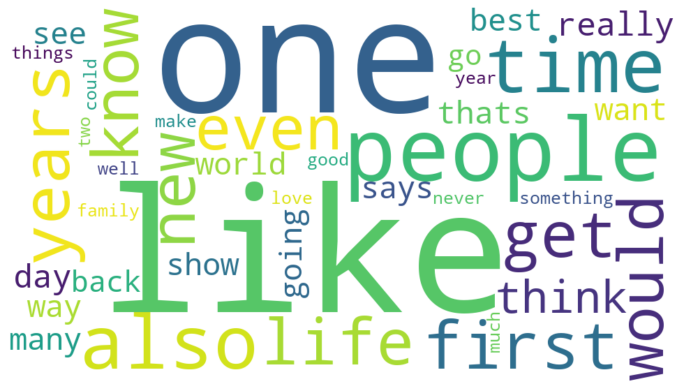

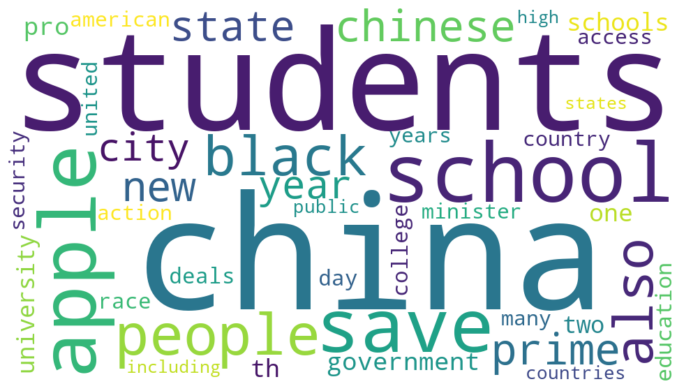

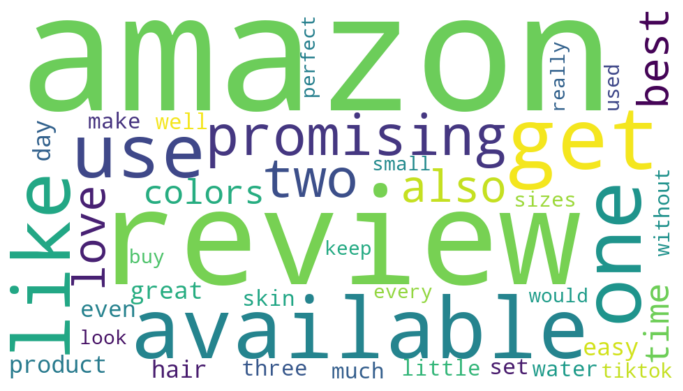

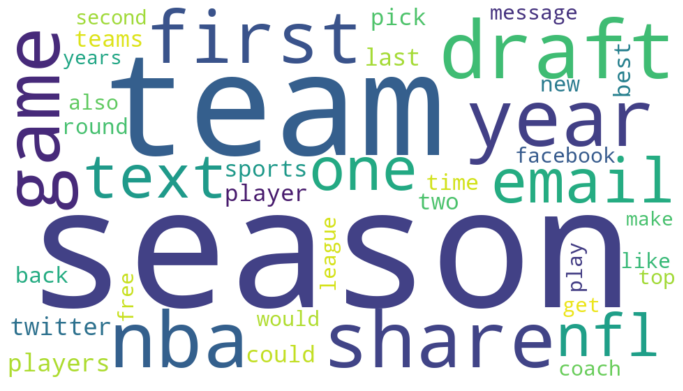

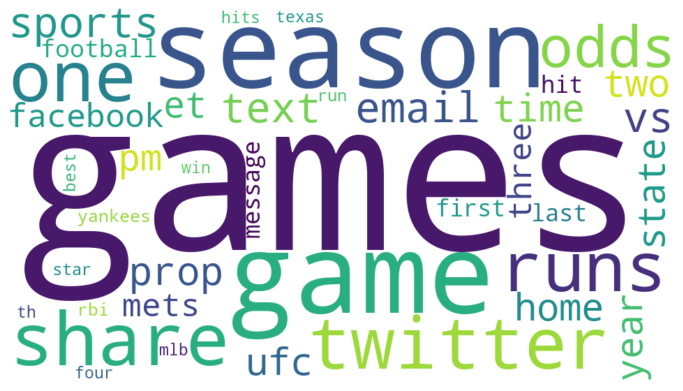

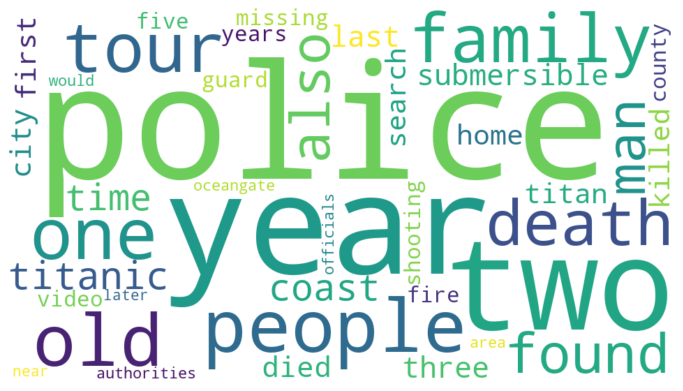

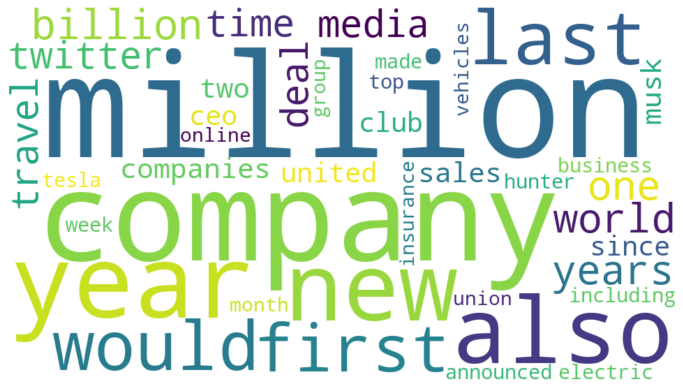

In [44]:
wordcloud_topics(lda_para_model, count_text_vectorizer.get_feature_names_out())

-----

### Time-based Charts for Topic modeling:

In [33]:
np.unique(api_data_complete_df['publish_date'])

array(['2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03',
       '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07',
       '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
       '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
       '2023-06-16', '2023-06-17', '2023-06-18', '2023-06-19',
       '2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23',
       '2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27',
       '2023-06-28', '2023-06-29', '2023-06-30'], dtype=object)

In [36]:
topic_names = []
voc=tfidf_topic.get_feature_names_out()
for topic in nmf_text_model_news.components_:
    important = topic.argsort()
    top_word=voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append(top_word)

Add topic assignment number and name to each article as features:

In [37]:
#topic_ = defaultdict(list)
for idx, row in enumerate(text_matrix) : 
    topic3 = np.where(row == np.amax(row))[0]
    in_order =row.argsort()
    topic2nd = in_order[1]
    topic3rd =  in_order[2]
    important_=topic3.argsort()
    #print(topic3, topic2nd, topic3rd)
    api_data_complete_df.at[idx,"topic"]=topic3[0]
    api_data_complete_df.at[idx,"topic_name"]=topic_names[topic3[0]]
    api_data_complete_df.at[idx,"topic_name_2nd"]=topic_names[topic2nd]
    api_data_complete_df.at[idx,"topic_name_3rd"]=topic_names[topic3rd]

    
    #topic_[topic3[0]].

In [58]:
#word=voc[nmf_text_model_news.components_.argsort()[-1]] + " " + \
#    voc[nmf_text_model_news.components_.argsort()[-2]]


In [43]:
api_data_complete_df.head()

index  text_id source_name                                author  \
0      0        2   USA Today  USA TODAY, Emily DeLetter, USA TODAY   
1      1        3   USA Today     USA TODAY, Joy Ashford, USA TODAY   
2      2        5   USA Today                        Tar Heels Wire   
3      3        6   USA Today                        Roll Tide Wire   
4      4        7   USA Today                          Celtics Wire   

                                               title  \
0  Tito's launches 'Tito's in a Big Can,' an empt...   
1  Search for missing actor Julian Sands continue...   
2  Four star running back picks Michigan State ov...   
3  Alabama center Charles Bediako signs one-year ...   
4  Ralph Sampson breaks down iconic Boston Celtic...   

                                                 url publish_date  \
0  https://www.usatoday.com/story/money/food/2023...   2023-06-21   
1  https://www.usatoday.com/story/entertainment/c...   2023-06-20   
2  https://tarheelswire.usatoday.com/2023/06/24/f...   2023-06-25   
3  https://rolltidewire.usatoday.com/2023/06/23/a...   2023-06-23   
4  https://celticswire.usatoday.com/2023/06/23/nb...   2023-06-23   

                                        article_text  \
0  Have you ever wanted to own your very own keg ...   
1  Over five months after Julian Sands went missi...   
2  \n\n\n\n\n\n\n\n\n\n\n\n\n\nFour star running ...   
3  \n\n\n\n\n\n\n\n\n\n\n\n\n\nAlabama center Cha...   
4  \n\n\n\n\n\n\n\n\n\n\n\n\n\nRalph Sampson brea...   

                                             content  \
0  Have you ever wanted to own your very own keg ...   
1  Over five months after Julian Sandswent missin...   
2  Mack Brown and the UNC football program have b...   
3  Alabama center Charles Bediako was signed to a...   
4  It was one of the most memorable moments in NB...   

                                      processed_text  \
0  ever wanted keg titos handmade vodka dream bec...   
1  five months julian sands went missing solo hik...   
2  four star running back picks michigan state un...   
3  alabama center charles bediako signs one year ...   
4  ralph sampson breaks iconic boston houston roc...   

                                processed_text_split  num_tokens  \
0  ['ever', 'wanted', 'keg', 'titos', 'handmade',...         117   
1  ['five', 'months', 'julian', 'sands', 'went', ...         215   
2  ['four', 'star', 'running', 'back', 'picks', '...         161   
3  ['alabama', 'center', 'charles', 'bediako', 's...         237   
4  ['ralph', 'sampson', 'breaks', 'iconic', 'bost...         134   

   original_word_count                                             tokens  \
0                  202  [ever, wanted, keg, titos, handmade, vodka, dr...   
1                  340  [five, months, julian, sands, went, missing, s...   
2                  286  [four, star, running, back, picks, michigan, s...   
3                  381  [alabama, center, charles, bediako, signs, one...   
4                  228  [ralph, sampson, breaks, iconic, boston, houst...   

                                clean_processed_text  topic     topic_name  \
0  ever wanted keg titos handmade vodka dream bec...    2.0  amazon review   
1  five months julian sands went missing solo hik...    9.0   police court   
2  four star running back picks michigan state un...    0.0   season draft   
3  alabama center charles bediako signs one year ...    0.0   season draft   
4  ralph sampson breaks iconic boston houston roc...    0.0   season draft   

    topic_name_2nd     topic_name_3rd  
0  trump president  russian prigozhin  
1  trump president    inflation rates  
2    amazon review    trump president  
3    amazon review    trump president  
4    amazon review    trump president

<Figure size 2500x700 with 0 Axes>

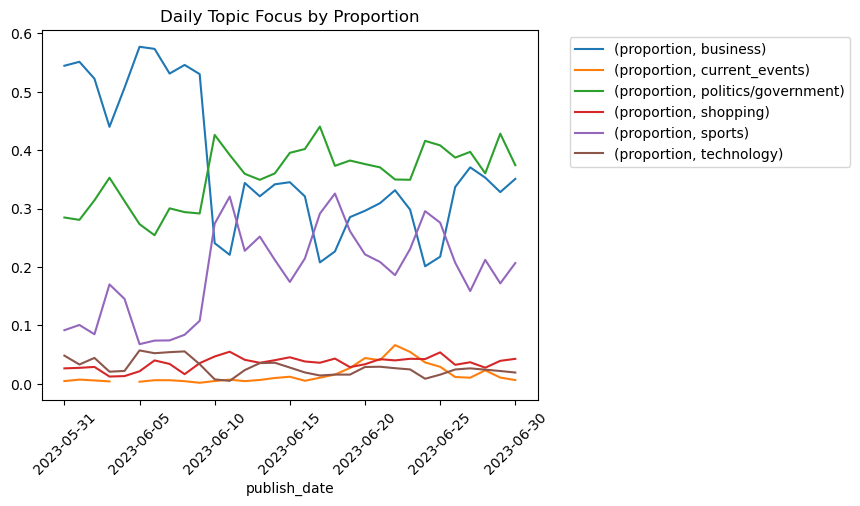

<Figure size 2500x700 with 0 Axes>

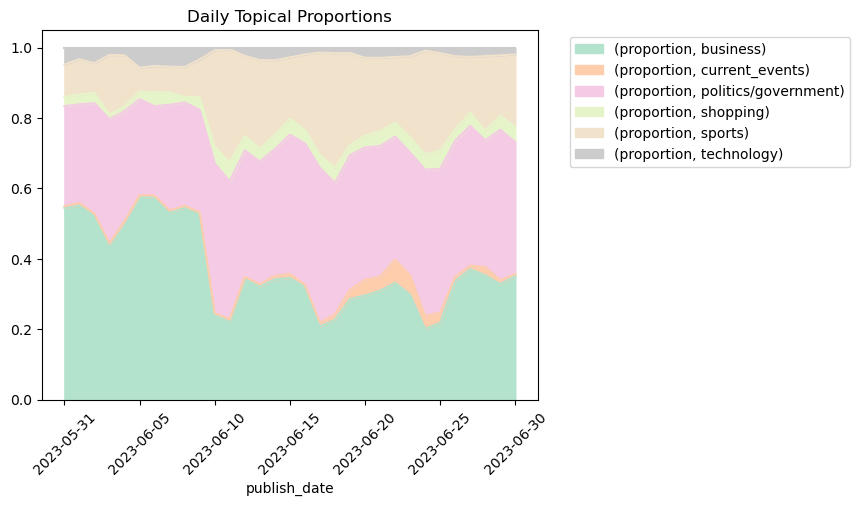

<Figure size 2500x700 with 0 Axes>

In [56]:


df_day1=api_data_complete_df[['publish_date', 'customer_topics']]
topics_by_date=df_day1.groupby(df_day1['publish_date']).value_counts(normalize=True)

topics_by_date.head()


df_day=pd.DataFrame(topics_by_date)#.set_index(0)
df_day.head(20)
dfg = df_day.groupby(['publish_date', 'customer_topics']).agg({'proportion': sum}).reset_index()
dfg.head()
df = dfg.set_index(['publish_date', 'customer_topics']).unstack()
df.plot()
plt.title('Daily Topic Focus by Proportion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.figure(figsize=(25, 7))


df.plot.area(colormap="Pastel2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Daily Topical Proportions')
plt.figure(figsize=(25, 7))

---

**The topic modeling charts above are generated using Non-Negative Matrix Topic modeling (since this model had more well-defined topics than Latent Dirichlet Allocation modeling) and reveal the most relevant topic in the beginning of June was "Business and Travel," to then taper off to similar levels as that of "Police and Court."**

**Although TV media coverage was overwhelmingly about the titan submersible for that month, the online media does not exhibit this same behavior as it is covered, but not in a larger proportion as other topics.**

**Sports coverage appears to be high in proportion as a topic for the month since the topics "Season and Draft," which is likely about the NBA (after looking at the relevant wordcloud for this topic), and "Prop and Runs," which is likely refering to Baseball both add up to be significant topics in proportion**

----

### Topic Modeling Overall Distribution

In [49]:
topics_overall = api_data_complete_df['topic_name'].value_counts(normalize=True)
display(topics_overall)

topic_name
business work          0.272435
police court           0.270622
season draft           0.162725
inflation rates        0.069908
trump president        0.057025
prop runs              0.042851
russian prigozhin      0.041560
amazon review          0.037605
ai generative          0.026205
titanic submersible    0.019063
Name: proportion, dtype: float64

In [50]:
topics_overall_df=pd.DataFrame(topics_overall)
topics_overall_df.head()

proportion
topic_name                 
business work      0.272435
police court       0.270622
season draft       0.162725
inflation rates    0.069908
trump president    0.057025

In [75]:
topics_overall_df['proportion']=round(topics_overall_df['proportion'],4)
topics_overall_df=topics_overall_df.sort_values('proportion', ascending=True)



[Text(0, 0, '0.0191'),
 Text(0, 0, '0.0262'),
 Text(0, 0, '0.0376'),
 Text(0, 0, '0.0416'),
 Text(0, 0, '0.0429'),
 Text(0, 0, '0.057'),
 Text(0, 0, '0.0699'),
 Text(0, 0, '0.1627'),
 Text(0, 0, '0.2706'),
 Text(0, 0, '0.2724')]

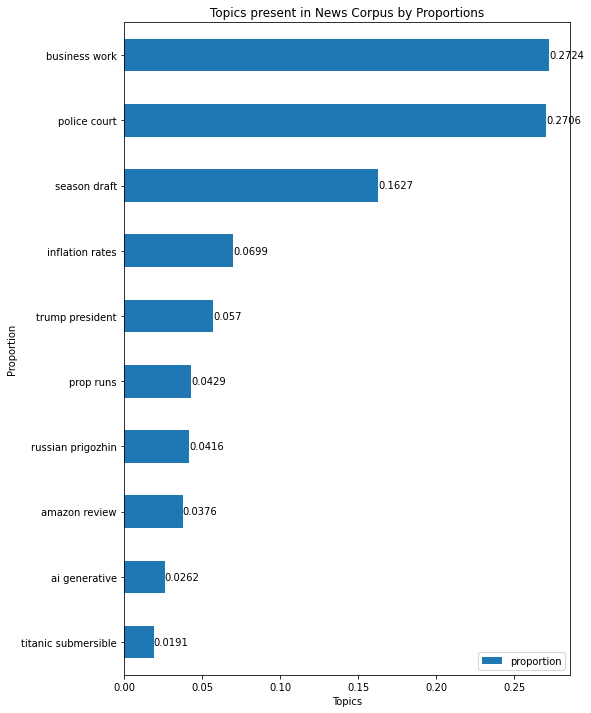

In [77]:
#topics_overall.

ax4=topics_overall_df['proportion'].plot(kind="barh", x='topic_name',rot=0,
                                  legend=True,
                                  figsize=(8,12),
                                  xlabel='Topics',
                                  ylabel='Proportion',
                                  #='Political_Lean',
                                  title='Topics present in News Corpus by Proportions')
ax4.bar_label(ax4.containers[0])

---

**The highest proportion of articles *27.24%* are about the topic "Business Travel" with "Police Court" following at *27.06%* and with the smallest proportion being "Titanic Submersible" at *1.91%***

**Season/Draft (NBA sports) when added to Prop/Runs (Baseball sports), the Sports topic adds up to *20.57%***

---

### Analysis of "Amazon review" Topic

In [42]:
api_data_complete_df=pd.read_csv('../data/capstone_master_3topic_assignment_0725.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../data/capstone_master_3topic_assignment_0725.csv'

In [41]:
api_data_complete_df.head(20)

Unnamed: 0  text_id source_name                                author  \
0            0        2   USA Today  USA TODAY, Emily DeLetter, USA TODAY   
1            1        3   USA Today     USA TODAY, Joy Ashford, USA TODAY   
2            2        5   USA Today                        Tar Heels Wire   
3            3        6   USA Today                        Roll Tide Wire   
4            4        7   USA Today                          Celtics Wire   
5            5        8   USA Today                           Lebron Wire   
6            6       14   USA Today                        Roll Tide Wire   
7            7       16   USA Today                           Eagles Wire   
8            8       18   USA Today                          Trojans Wire   
9            9       22    ABC News                           Teddy Grant   
10          10       23   USA Today                         Steelers Wire   
11          11       24   USA Today                             Rams Wire   
12          12       26   USA Today                        Roll Tide Wire   
13          13       27   USA Today                          Badgers Wire   
14          14       30   USA Today                             Rams Wire   
15          15       32   USA Today                           Giants Wire   
16          16       33   USA Today           Janelle Randazza, USA TODAY   
17          17       35   USA Today                        Buffaloes Wire   
18          18       38   USA Today                            Bills Wire   
19          19       39   USA Today              Ken Alltucker, USA TODAY   

                                                title  \
0   Tito's launches 'Tito's in a Big Can,' an empt...   
1   Search for missing actor Julian Sands continue...   
2   Four star running back picks Michigan State ov...   
3   Alabama center Charles Bediako signs one-year ...   
4   Ralph Sampson breaks down iconic Boston Celtic...   
5   Cowherd: Lakers are delusional for wanting to ...   
6   Recruiting Roundup: Latest Alabama Football re...   
7   Eagles’ 2023 training camp preview: Jalen Hurt...   
8   Lincoln Riley’s late-night emoji tweets equal ...   
9   Washington passes California as most expensive...   
10  Check out the pics of Steelers players with do...   
11  Look: Stetson Bennett caught a massive fish in...   
12  Alabama to remain a national title contender f...   
13  Badger football fans ranked average for overal...   
14  Rams get 2 more draft picks under contract, 8 ...   
15  Giants great Tiki Barber will announce CBS gam...   
16  13 things we're buying that are inspired by Hu...   
17  College football analyst reveals Pac-12 coache...   
18   PFF: Bills have a top-10 coach in Sean McDermott   
19  Against backdrop of a mental health care short...   

                                                  url publish_date  \
0   https://www.usatoday.com/story/money/food/2023...   2023-06-21   
1   https://www.usatoday.com/story/entertainment/c...   2023-06-20   
2   https://tarheelswire.usatoday.com/2023/06/24/f...   2023-06-25   
3   https://rolltidewire.usatoday.com/2023/06/23/a...   2023-06-23   
4   https://celticswire.usatoday.com/2023/06/23/nb...   2023-06-23   
5   https://lebronwire.usatoday.com/2023/06/29/cow...   2023-06-29   
6   https://rolltidewire.usatoday.com/lists/alabam...   2023-06-20   
7   https://theeagleswire.usatoday.com/lists/phila...   2023-06-23   
8   https://trojanswire.usatoday.com/2023/06/28/li...   2023-06-28   
9   https://abcnews.go.com/US/washington-passes-ca...   2023-06-22   
10  https://steelerswire.usatoday.com/2023/06/22/p...   2023-06-22   
11  https://theramswire.usatoday.com/2023/06/26/ra...   2023-06-26   
12  https://rolltidewire.usatoday.com/2023/06/27/a...   2023-06-27   
13  https://badgerswire.usatoday.com/2023/06/20/ba...   2023-06-21   
14  https://theramswire.usatoday.com/2023/06/21/ra...   2023-06-21   
15  https://giantswire.usatoday.com/2023/06/27/new...   2023-06-27  

In [54]:
Amazon_articles_idx = api_data_complete_df.groupby(api_data_complete_df['topic_name'] ==\
     'amazon review')['url']
Amazon_articles_df=pd.DataFrame(Amazon_articles_idx)
Amazon_articles_df.head()
Amazon_articles_df2=pd.DataFrame(Amazon_articles_df.iloc[1,1])



In [55]:
Amazon_articles_df2.head()


url
0    https://www.usatoday.com/story/money/food/2023...
16   https://www.usatoday.com/story/money/reviewed/...
34   https://www.usatoday.com/story/money/reviewed/...
56   https://www.usatoday.com/story/money/reviewed/...
109  https://www.usatoday.com/story/money/reviewed/...

In [56]:
Amazon_articles_df2.loc[16,'url']


'https://www.usatoday.com/story/money/reviewed/2023/06/22/the-bear-on-hulu-must-haves-when-watching-season-2/70347225007/'

In [57]:
Amazon_articles_df2.shape

(1369, 1)

---

**Upon deeper analysis of the topic_name "amazon review," we find that the total number of articles categorized as this topic are *1,369*. Most of these articles are Review-based on items purchased on Amazon. But some are ads or others are actual stories. Given the small number overall and the difficulty in parsing out the articles that are related to ads or reviews without removing the valid stories, we will keep these articles for now and analyze positive sentiment articles to see if these show up to then filter accordingly.**

---

### Save data so far:

In [57]:
api_data_complete_df.to_csv("capstone_master_topic_assignment_0728.csv", sep=',')

----------------
